In [1]:
import pandas  as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [2]:
user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')

In [3]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
logs.platform.nunique()

3

In [5]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [6]:
success = logs.query('success == True')

In [10]:
success.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772


In [16]:
success_gr = success.groupby('client', as_index = False)\
.agg({'success':'count'}).sort_values(['success','client'], ascending = False)



In [17]:
success_gr.head()

,client,success
2626,92584,41
2345,82563,41
2231,78349,41
1759,61473,41
1758,61468,41


In [8]:
success.groupby('platform').agg({'success':'count'}).sort_values(['success','platform'], ascending = False).head(10)

,success
platform,
phone,2019
computer,1090
tablet,180


In [9]:
union = logs.merge(user_data , on = 'client').query('premium == True')

In [21]:
union.head()

,client,success,platform,time,premium,age
42,35604,False,phone,1585459894,True,65
49,11983,True,phone,1585459511,True,68
52,99308,True,computer,1585409409,True,38
59,49625,False,phone,1585447789,True,65
64,53978,True,computer,1585408637,True,46


In [10]:
union.groupby('platform').agg({'premium':'count'})

,premium
platform,
computer,150
phone,246
tablet,24


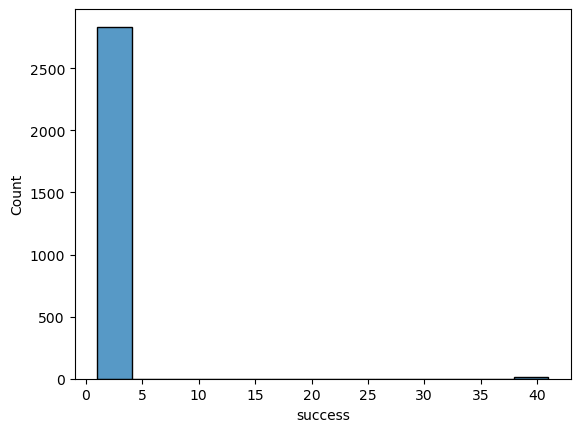

In [18]:
sns.histplot(data=success_gr, x="success");

In [ ]:
sns.histplot(data=success_gr, x="success", kde=True, hue = 'premium', stat="density", common_norm=False);

In [24]:
success_comp = success.query("platform == 'computer'").groupby('client', as_index = False)\
    .agg({'success':'count'})\
    .rename(columns = {'success':'count_of_success'})\
    .merge(user_data, on = 'client')

In [56]:
success_comp

,client,count_of_success,premium,age
0,164,1,False,37
1,405,1,False,37
2,991,1,False,69
3,995,1,False,28
4,1057,1,False,65
...,...,...,...,...
713,99592,1,False,35
714,99636,1,False,44
715,99864,1,False,26
716,99868,1,False,39


In [40]:
success_comp_age = success_comp.groupby('age',as_index = False)\
    .agg({'count_of_success':'sum'})


In [55]:
success_comp_age.sort_values('count_of_success')

,age,count_of_success
33,53,5
36,56,6
2,22,8
10,30,8
35,55,9
46,66,9
21,41,10
14,34,10
25,45,11
19,39,11


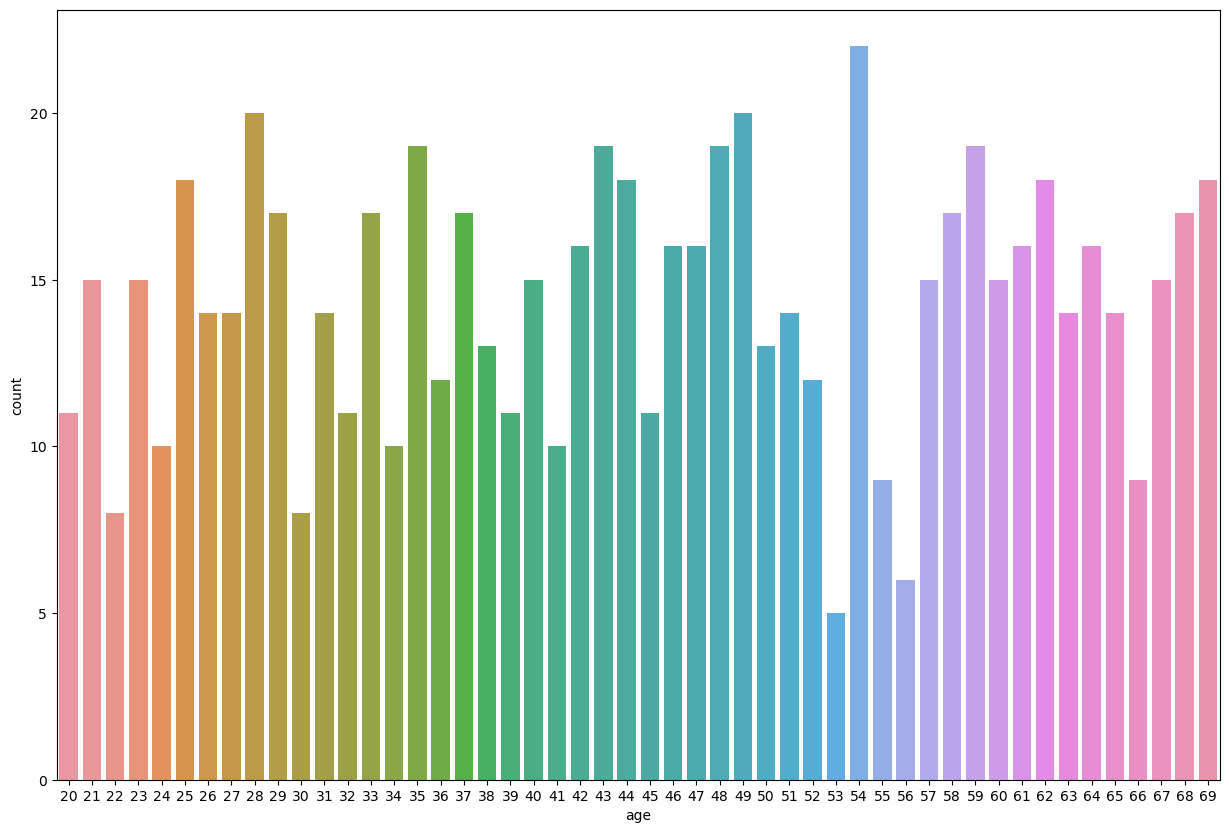

In [54]:
plt.figure(figsize=(15, 10))
sns.countplot(data=success_comp, x="age");

<AxesSubplot:xlabel='age', ylabel='Count'>

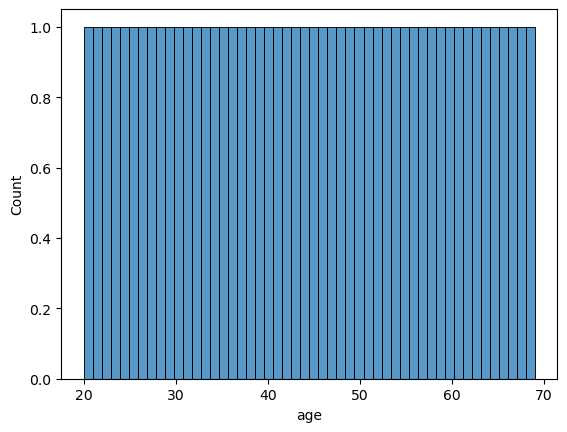

In [45]:
sns.histplot(data=success_comp_age, x="age", bins = 50)